# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros;
- Aplique três métodos de clustering distintos nas duas bases acima.
- Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
from datetime import datetime
import pandas as pd
from sklearn.cluster import *
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **kaggle_Interests_group.csv** que contém dados de interesses de pessoas e foram classificadas em quatro grupos.

## 1.1 Informações sobre os dados:

#### Atributos:

## 1.2 Carregamento do arquivo

In [11]:
dataset = './dataset/s1.csv'
clusters = './dataset/s1-label.csv'

In [14]:
# Carregando os dados apenas com as colunas desejadas
data = pd.read_csv(
    dataset,
    header = None
    )

label = pd.read_csv(
    clusters,
    header = None
    )

In [15]:
data.head()

,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [16]:
data.describe()

,0,1
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


# 2. Pré-processamento

#### Problemas idenficados:
- 1. Dados faltantes representados por "NaN"

In [17]:
data.isna().sum()

0    0
1    0
dtype: int64

In [19]:
for col in data:
    print(col, data[col].unique())


0 [664159 665845 597173 ... 650661 599647 684091]
1 [550946 557965 575538 ... 861267 858702 842566]


### 2.2 Análise estatística

### 2.5 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [22]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data)

In [23]:
data_scaler

array([[0.61045883, 0.23847578],
       [0.61735618, 0.26824035],
       [0.33642184, 0.34275992],
       ...,
       [0.55523906, 1.55441419],
       [0.34654287, 1.54353712],
       [0.69199982, 1.47511126]])

In [24]:
data_scaled = pd.DataFrame(data_scaler)
data_scaled.head()


,0,1
0,0.610459,0.238476
1,0.617356,0.268240
2,0.336422,0.342760
3,0.424079,0.240596
4,0.493993,0.480612


### 2.3 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há diversos outliers. Adiante os atributos com outliers serão removidos para aplicar os algoritmos pela 2ª vez.

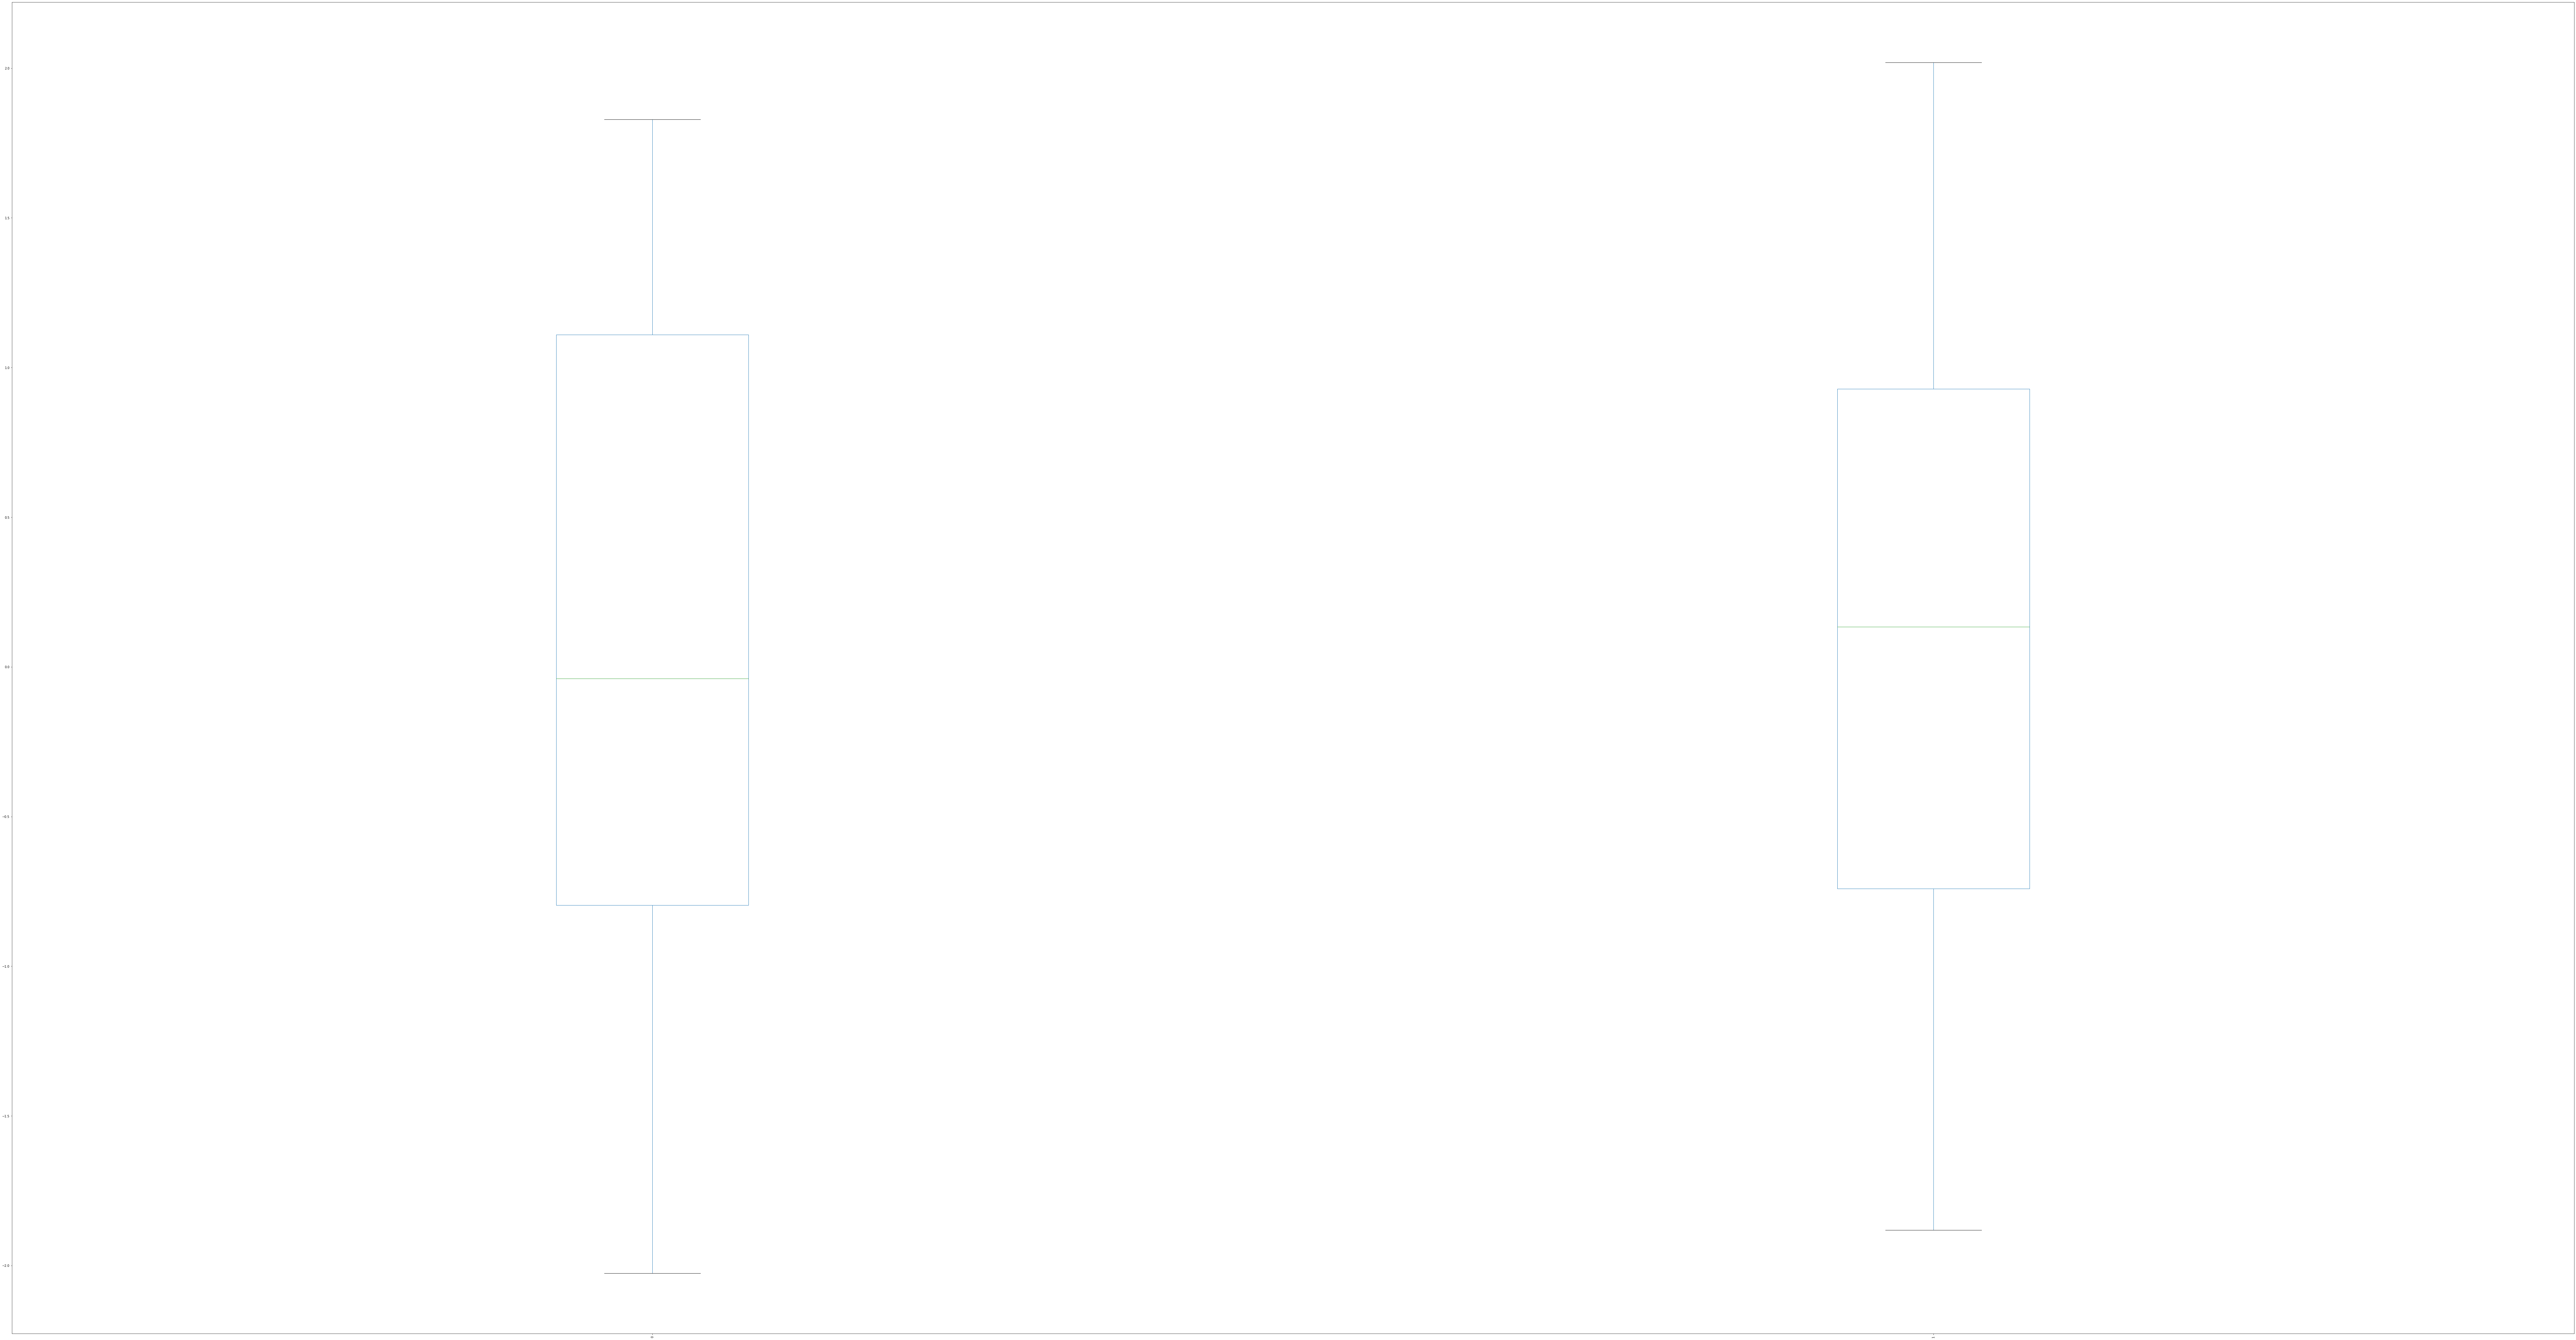

In [35]:
data_scaled.plot(kind = 'box', figsize=(150,80), rot=90, )

# 3. Clustering

## 3.1 Dataset Completo

### 3.1.1 K-Means

In [27]:
data_kmeans = data_scaled.copy()

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(data_kmeans)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

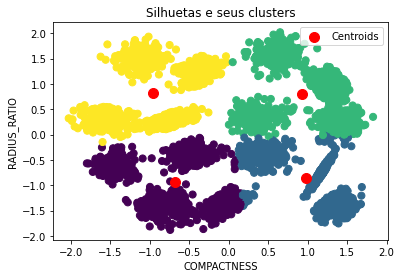

In [32]:
plt.scatter(data_scaler[:,0], data_scaler[:,1], s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()

### 3.1.2 Agglomerative Clustering

In [36]:
data_agglo = data_scaled.copy()

In [37]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo.fit(data_agglo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

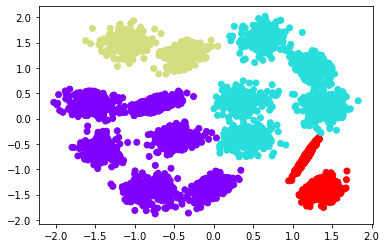

In [39]:
plt.scatter(data_scaler[:,0],data_scaler[:,1], c=agglo.labels_, cmap='rainbow')

### 3.1.3 Spectral Clustering

In [40]:
data_spectral = data_scaled.copy()

In [41]:
spectral = SpectralClustering(n_clusters=4)
spectral.fit(data_spectral)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

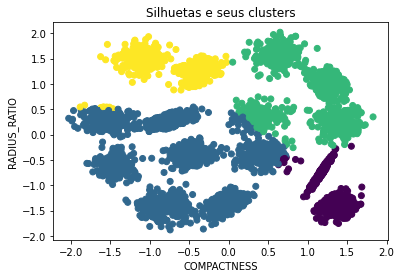

In [42]:
plt.scatter(data_scaler[:,0], data_scaler[:,1], c = spectral.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()

## 3.2 Dataset com atributos selecionados

In [43]:
data_reduzida = data_scaled.drop(columns=[1])
data_reduzida.head()

,0
0,0.610459
1,0.617356
2,0.336422
3,0.424079
4,0.493993


In [44]:
data_scaler2 = data_reduzida.values

### 3.2.1 K-Means

In [45]:
data_kmeans2 = data_reduzida.copy()

In [46]:
kmeans2 = KMeans(n_clusters = 4, init = 'random')
kmeans2.fit(data_kmeans2)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

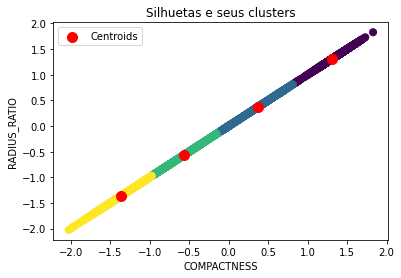

In [47]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,0], s = 50, c = kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 0], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()

### 3.2.2 Agglomerative Clustering

In [48]:
data_agglo2 = data_reduzida.copy()

In [49]:
agglo2 = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo2.fit(data_agglo2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

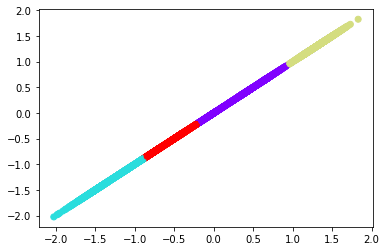

In [51]:
plt.scatter(data_scaler2[:,0],data_scaler2[:,0], c=agglo2.labels_, cmap='rainbow')

### 3.2.3

In [52]:
data_spectral2 = data_reduzida.copy()

In [53]:
spectral2 = SpectralClustering(n_clusters=4)
spectral2.fit(data_spectral2)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

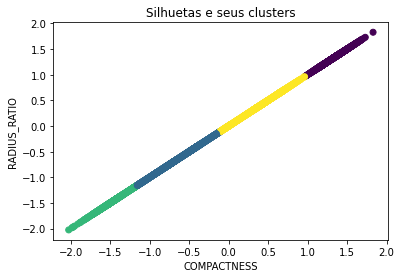

In [55]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,0], c = spectral2.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()